In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))

In [3]:
from load_dataset import Dataset
from plotting import plot_ts

In [4]:
ds = Dataset('./data/dataset/')

In [5]:
ts = ds['std_example.csv']

<AxesSubplot:xlabel='2018-08-01 03:00:00+03:00'>

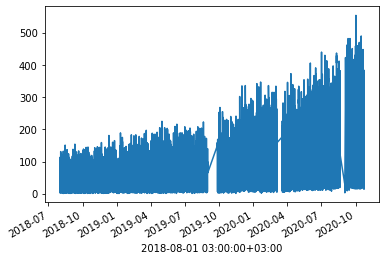

In [6]:
ts.plot()

In [7]:
for key, ts in ds:
    print(key)
    plot_ts(ts)

day_2690.csv


Loading BokehJS ...

day_2135.csv


Loading BokehJS ...

day_1164.csv


Loading BokehJS ...

day_3015.csv


Loading BokehJS ...

day_1158.csv


Loading BokehJS ...

day_1776.csv


Loading BokehJS ...

day_1762.csv


Loading BokehJS ...

day_309.csv


Loading BokehJS ...

hour_376.csv


Loading BokehJS ...

day_321.csv


Loading BokehJS ...

day_335.csv


Loading BokehJS ...

day_2531.csv


Loading BokehJS ...

hour_1804.csv


Loading BokehJS ...

day_1574.csv


Loading BokehJS ...

day_1206.csv


Loading BokehJS ...

day_2069.csv


Loading BokehJS ...

day_3376.csv


Loading BokehJS ...

day_687.csv


Loading BokehJS ...

day_2915.csv


Loading BokehJS ...

day_2901.csv


Loading BokehJS ...

day_3148.csv


Loading BokehJS ...

day_2256.csv


Loading BokehJS ...

day_1039.csv


Loading BokehJS ...

day_446.csv


Loading BokehJS ...

day_1777.csv


Loading BokehJS ...

day_2281.csv


Loading BokehJS ...

day_1159.csv


Loading BokehJS ...

day_2450.csv


Loading BokehJS ...

day_2336.csv


Loading BokehJS ...

day_2493.csv


Loading BokehJS ...

hour_3380.csv


Loading BokehJS ...

day_724.csv


Loading BokehJS ...

day_718.csv


Loading BokehJS ...

day_2108.csv


Loading BokehJS ...

hour_2263.csv


Loading BokehJS ...

day_2685.csv


Loading BokehJS ...

day_2875.csv


Loading BokehJS ...

stl_example.csv


Loading BokehJS ...

day_915.csv


Loading BokehJS ...

day_929.csv


Loading BokehJS ...

day_1403.csv


Loading BokehJS ...

day_2888.csv


Loading BokehJS ...

hour_3625.csv


Loading BokehJS ...

day_1832.csv


Loading BokehJS ...

day_1173.csv


Loading BokehJS ...

day_2308.csv


Loading BokehJS ...

day_1601.csv


Loading BokehJS ...

day_1167.csv


Loading BokehJS ...

day_2334.csv


Loading BokehJS ...

day_493.csv


Loading BokehJS ...

day_2283.csv


Loading BokehJS ...

day_3610.csv


Loading BokehJS ...

day_1007.csv


Loading BokehJS ...

day_1761.csv


Loading BokehJS ...

day_478.csv


Loading BokehJS ...

hour_3553.csv


Loading BokehJS ...

hour_3426.csv


Loading BokehJS ...

hour_3618.csv


Loading BokehJS ...

hour_3387.csv


Loading BokehJS ...

hour_3594.csv


Loading BokehJS ...

hour_2098.csv


Loading BokehJS ...

hour_3621.csv


Loading BokehJS ...

hour_3192.csv


Loading BokehJS ...

hour_3019.csv


Loading BokehJS ...

daily-min-temperatures.csv


Loading BokehJS ...

dow_jones_3.csv


Loading BokehJS ...

dow_jones_2.csv


Loading BokehJS ...

international-airline-passengers.csv


Loading BokehJS ...

dow_jones_0.csv


Loading BokehJS ...

std_example.csv


Loading BokehJS ...

dow_jones_1.csv


Loading BokehJS ...

alcohol_sales.csv


Loading BokehJS ...

In [60]:
ts = ds['day_1007.csv']

In [61]:
plot_ts(ts)

Loading BokehJS ...

In [67]:
import numpy as np
import pandas as pd

from typing import Tuple

def transform_ts_into_matrix(ts: pd.Series, num_lags_in: int, num_lags_out: int) -> Tuple[np.array, np.array]:
    """
    Данная функция должна пройтись скользящим окном по временному ряду и для каждых
    num_lags_in точек в качестве признаков собрать num_lags_out следующих точек в качестве таргета.
    
    Вернуть два np.array массива из X_train и y_train соответственно
    """
    sequence = ts.values
    X, y = list(), list()
    i = 0
    outer_idx = num_lags_out
    while outer_idx < len(sequence):
        inner_idx = i + num_lags_in
        outer_idx = inner_idx + num_lags_out
        X_, y_ = sequence[i:inner_idx], sequence[inner_idx:outer_idx]
        X.append(X_)
        y.append(y_)
        i += 1
    return np.array(X), np.array(y)

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [90]:
num_lags = 48
num_output = 24

In [91]:
X, y = transform_ts_into_matrix(ts, num_lags, num_output)

X_train, y_train = X[:-1], y[:-1]
X_test, y_test = X[[-1]], y[-1]

In [102]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_lags))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_output))
model.compile(optimizer='adam', loss='mse')

In [103]:
model.fit(X_train, y_train, epochs=1100)

Epoch 1/1100
1/1 [==============================] - 0s 312ms/step - loss: 7.4378e-04
Epoch 2/1100
1/1 [==============================] - 0s 2ms/step - loss: 5.2868e-04
Epoch 3/1100
1/1 [==============================] - 0s 2ms/step - loss: 4.0517e-04
Epoch 4/1100
1/1 [==============================] - 0s 2ms/step - loss: 2.9704e-04
Epoch 5/1100
1/1 [==============================] - 0s 2ms/step - loss: 2.3816e-04
Epoch 6/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.9168e-04
Epoch 7/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.7155e-04
Epoch 8/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.5086e-04
Epoch 9/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2379e-04
Epoch 10/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.1581e-04
Epoch 11/1100
1/1 [==============================] - 0s 3ms/step - loss: 9.9303e-05
Epoch 12/1100
1/1 [==============================] - 0s 4ms/step - loss: 8.7652e-05

1/1 [==============================] - 0s 5ms/step - loss: 1.2718e-05
Epoch 99/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2749e-05
Epoch 100/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2690e-05
Epoch 101/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2695e-05
Epoch 102/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2694e-05
Epoch 103/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2774e-05
Epoch 104/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2746e-05
Epoch 105/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2773e-05
Epoch 106/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2773e-05
Epoch 107/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2738e-05
Epoch 108/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2772e-05
Epoch 109/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2718e

1/1 [==============================] - 0s 8ms/step - loss: 1.2740e-05
Epoch 195/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2711e-05
Epoch 196/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2733e-05
Epoch 197/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2673e-05
Epoch 198/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2673e-05
Epoch 199/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2673e-05
Epoch 200/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2704e-05
Epoch 201/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2672e-05
Epoch 202/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2740e-05
Epoch 203/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2670e-05
Epoch 204/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2677e-05
Epoch 205/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2775

1/1 [==============================] - 0s 4ms/step - loss: 1.2695e-05
Epoch 290/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2664e-05
Epoch 291/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2702e-05
Epoch 292/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2703e-05
Epoch 293/1100
1/1 [==============================] - 0s 7ms/step - loss: 1.2694e-05
Epoch 294/1100
1/1 [==============================] - 0s 12ms/step - loss: 1.2655e-05
Epoch 295/1100
1/1 [==============================] - 0s 8ms/step - loss: 1.2778e-05
Epoch 296/1100
1/1 [==============================] - 0s 10ms/step - loss: 1.2738e-05
Epoch 297/1100
1/1 [==============================] - 0s 8ms/step - loss: 1.2662e-05
Epoch 298/1100
1/1 [==============================] - 0s 7ms/step - loss: 1.2737e-05
Epoch 299/1100
1/1 [==============================] - 0s 20ms/step - loss: 1.2701e-05
Epoch 300/1100
1/1 [==============================] - 0s 14ms/step - loss: 1.

1/1 [==============================] - 0s 2ms/step - loss: 1.2724e-05
Epoch 386/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2687e-05
Epoch 387/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2644e-05
Epoch 388/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2764e-05
Epoch 389/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2721e-05
Epoch 390/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2764e-05
Epoch 391/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2692e-05
Epoch 392/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2765e-05
Epoch 393/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2726e-05
Epoch 394/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2765e-05
Epoch 395/1100
1/1 [==============================] - 0s 7ms/step - loss: 1.2636e-05
Epoch 396/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2723

1/1 [==============================] - 0s 4ms/step - loss: 1.2765e-05
Epoch 482/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2605e-05
Epoch 483/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2669e-05
Epoch 484/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2603e-05
Epoch 485/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2698e-05
Epoch 486/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2715e-05
Epoch 487/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2768e-05
Epoch 488/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2748e-05
Epoch 489/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2716e-05
Epoch 490/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2613e-05
Epoch 491/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2775e-05
Epoch 492/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2666

1/1 [==============================] - 0s 3ms/step - loss: 1.2546e-05
Epoch 578/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2708e-05
Epoch 579/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2574e-05
Epoch 580/1100
1/1 [==============================] - 0s 7ms/step - loss: 1.2568e-05
Epoch 581/1100
1/1 [==============================] - 0s 8ms/step - loss: 1.2739e-05
Epoch 582/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2749e-05
Epoch 583/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2748e-05
Epoch 584/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2636e-05
Epoch 585/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2741e-05
Epoch 586/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2607e-05
Epoch 587/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2776e-05
Epoch 588/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2643

1/1 [==============================] - 0s 2ms/step - loss: 1.2699e-05
Epoch 674/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2711e-05
Epoch 675/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2528e-05
Epoch 676/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2722e-05
Epoch 677/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2617e-05
Epoch 678/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2650e-05
Epoch 679/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2479e-05
Epoch 680/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2524e-05
Epoch 681/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2608e-05
Epoch 682/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2700e-05
Epoch 683/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2640e-05
Epoch 684/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2469

1/1 [==============================] - 0s 4ms/step - loss: 1.2787e-05
Epoch 770/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2395e-05
Epoch 771/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2693e-05
Epoch 772/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2586e-05
Epoch 773/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2504e-05
Epoch 774/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2587e-05
Epoch 775/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2416e-05
Epoch 776/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2573e-05
Epoch 777/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2469e-05
Epoch 778/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2695e-05
Epoch 779/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2713e-05
Epoch 780/1100
1/1 [==============================] - ETA: 0s - loss: 1.2789e-0 

1/1 [==============================] - 0s 2ms/step - loss: 1.2411e-05
Epoch 864/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2411e-05
Epoch 865/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2807e-05
Epoch 866/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2268e-05
Epoch 867/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2406e-05
Epoch 868/1100
1/1 [==============================] - 0s 5ms/step - loss: 1.2645e-05
Epoch 869/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2802e-05
Epoch 870/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2411e-05
Epoch 871/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2406e-05
Epoch 872/1100
1/1 [==============================] - 0s 2ms/step - loss: 1.2785e-05
Epoch 873/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2644e-05
Epoch 874/1100
1/1 [==============================] - 0s 114ms/step - loss: 1.25

1/1 [==============================] - 0s 3ms/step - loss: 1.2177e-05
Epoch 960/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2799e-05
Epoch 961/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2512e-05
Epoch 962/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2308e-05
Epoch 963/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2583e-05
Epoch 964/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2160e-05
Epoch 965/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2157e-05
Epoch 966/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2357e-05
Epoch 967/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2134e-05
Epoch 968/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2429e-05
Epoch 969/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2439e-05
Epoch 970/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2443

1/1 [==============================] - 0s 3ms/step - loss: 1.2849e-05
Epoch 1055/1100
1/1 [==============================] - 0s 4ms/step - loss: 1.2479e-05
Epoch 1056/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2478e-05
Epoch 1057/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2811e-05
Epoch 1058/1100
1/1 [==============================] - 0s 7ms/step - loss: 1.2335e-05
Epoch 1059/1100
1/1 [==============================] - 0s 10ms/step - loss: 1.2627e-05
Epoch 1060/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2773e-05
Epoch 1061/1100
1/1 [==============================] - 0s 3ms/step - loss: 1.2357e-05
Epoch 1062/1100
1/1 [==============================] - 0s 8ms/step - loss: 1.2631e-05
Epoch 1063/1100
1/1 [==============================] - 0s 6ms/step - loss: 1.2354e-05
Epoch 1064/1100
1/1 [==============================] - 0s 8ms/step - loss: 1.2618e-05
Epoch 1065/1100
1/1 [==============================] - 0s 10ms/step -

In [104]:
y_pred = pd.Series(data=model.predict(X_test)[0], index=ts.index[-num_output:])

In [105]:
plot_ts(ts, y_pred)

Loading BokehJS ...

In [80]:
ts[-24:].corr(y_pred)

0.12507545056460867

In [48]:
from sklearn.metrics import mean_absolute_error as mse

mse(y_test, y_pred)

71.65511695543925

In [49]:
from metrics import mase

In [50]:
mase(y_pred, pd.Series(y_test))

1.2956931424444742

In [51]:
from pmdarima import auto_arima

In [64]:
stepwise_fit = auto_arima(ts[:-24], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=24,
                             start_P=0, seasonal=False,
                             d=0, D=0, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

/Users/gsinyakov/ts_spring/.env/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-504.357, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-323.233, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-482.557, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-376.969, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-498.378, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-516.244, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-414.453, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-498.517, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-430.873, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-523.942, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-526.631, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-527.235, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-

In [65]:
arima_pred = stepwise_fit.predict(24)

In [66]:
plot_ts(ts, pd.Series(arima_pred, index=ts.index[-24:]))

Loading BokehJS ...

In [59]:
mse(y_test, arima_pred)

89.44545292870036

In [85]:
ts[-24:].corr(pd.Series(arima_pred, index=ts.index[-24:]).dropna())

nan

In [82]:
arima_pred

array([0.01869728, 0.01869728, 0.01869728, 0.01869728, 0.01869728,
       0.01869728, 0.01869728, 0.01869728, 0.01869728, 0.01869728,
       0.01869728, 0.01869728, 0.01869728, 0.01869728, 0.01869728,
       0.01869728, 0.01869728, 0.01869728, 0.01869728, 0.01869728,
       0.01869728, 0.01869728, 0.01869728, 0.01869728])